#**Rでオープンデータ（FRED)を利用する**

このColabノートブックでは、ライブラリquantmodを使って、オープンデータを利用する方法を説明します。

具体的には、FREDからオープンデータである経済統計（経済データ）をダウンロードする方法を解説します。また、最後に応用問題として日本のフィリップス曲線をプロットする方法を説明します。

なお、このノートブックは「[Rの第一歩](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_R入門_1_basic.ipynb)」をすでに読んでいることを前提にしています。


**FREDとは？**
<br>
FRED（Federal Reserve Economic Data）とはアメリカのセントルイス連邦準備銀行が提供している経済統計データベースです。このサイトではアメリカを含め世界各国の経済統計（経済データ）約80万種類が提供されています。提供しているデータはすべてオープンデータです（オープンデータは講義資料で説明済み）。

**FRED公式サイト**
<br>
https://fred.stlouisfed.org/

In [2]:
# ライブラリquantmodをインストールします。
install.packages("quantmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




In [3]:
# 最初に必要なライブラリを読み込みます
library(quantmod)
library(dplyr)
library(ggplot2)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:xts’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




まず、日本の実質GDPを探します。Googleで"FRED japan real gdp"と検索するとReal Gross Domestic Product for Japanという以下のページが見つかります。

https://fred.stlouisfed.org/series/JPNRGDPEXP

このページにあるJPNRGDPEXPという文字列が「日本の実質GDP」を意味していますので、このJPNRGDPEXPを使ってFREDからデータをダウンロードします。

次にアメリカ合衆国の実質GDPをダウンロードすることを考えてみましょう。Googleで"FRED US real gdp"と検索するとReal Gross Domestic Product (GDPC1)という以下のページが見つかります。 

https://fred.stlouisfed.org/series/GDPC1

このページにあるGDPC1という文字列が「アメリカの実質GDP」を意味していますので、このGDPC1を使ってFREDからデータをダウンロードします。


In [4]:
tickers <-  c("JPNRGDPEXP", "GDPC1")
getSymbols(tickers, src = "FRED")

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "JPNRGDPEXP" "GDPC1"

In [5]:
JPNRGDPEXP %>% head()

           JPNRGDPEXP
1994-01-01   446278.0
1994-04-01   443805.1
1994-07-01   448938.0
1994-10-01   447131.3
1995-01-01   452082.7
1995-04-01   456345.6

In [6]:
GDPC1 %>% head()

              GDPC1
1947-01-01 2033.061
1947-04-01 2027.639
1947-07-01 2023.452
1947-10-01 2055.103
1948-01-01 2086.017
1948-04-01 2120.450

日本のGDPは1994年から、アメリカのGDPは1947年からです。2つとも同じ期間でグラフをプロットしてみたい場合、window()という関数を使って指定した期間だけ取り出すことができます。

たとえば、プロットする時期を以下のようにstart.date（開始時期）、end.date（終了時期）として指定します。

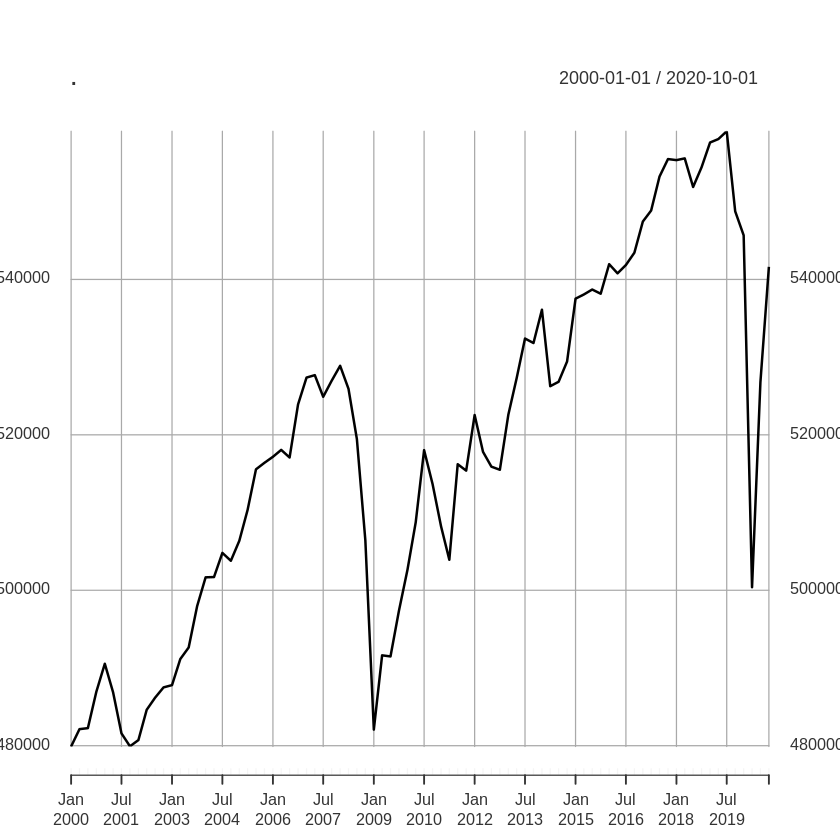

In [7]:
# 開始時期と終了時期
start.date <- "2000-01-01"
end.date <- "2020-12-31"

window(JPNRGDPEXP,start=start.date, end=end.date) %>% plot()

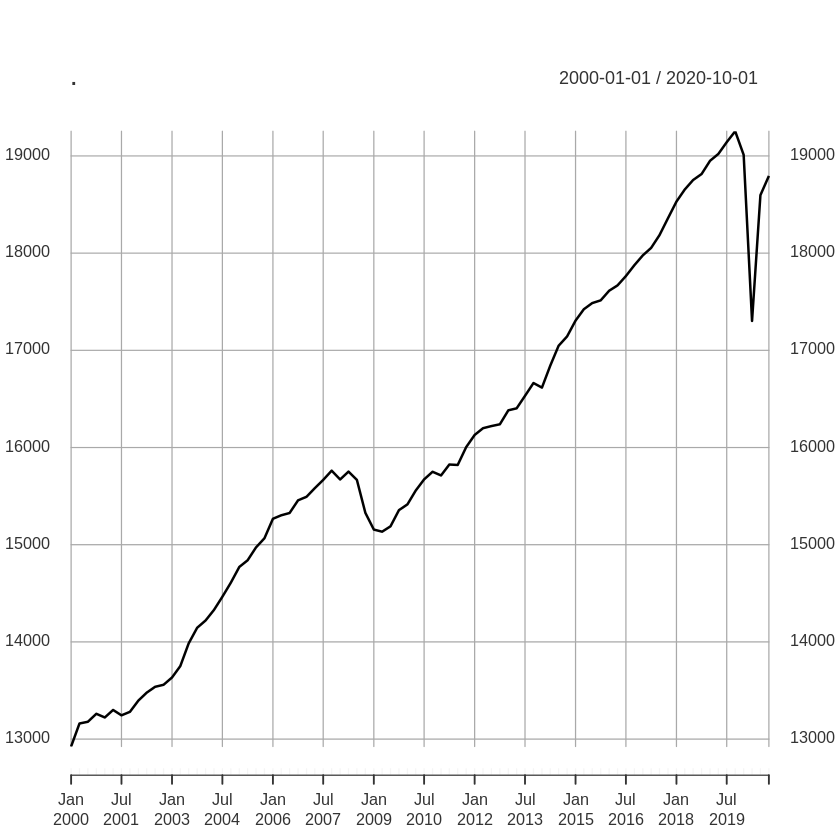

In [8]:
window(GDPC1,start=start.date, end=end.date) %>% plot()

グラフのプロットはとても簡単ですね。

**日本のフィリップス曲線をプロット**

最後に今までの知識を使って日本のフィリップス曲線をプロットしてみましょう。

https://fred.stlouisfed.org/series/LRUN64TTJPA156N

https://fred.stlouisfed.org/series/FPCPITOTLZGJPN



In [11]:
# 開始時期と終了時期
start.date <- "1970-01-01"
end.date <- "2020-12-31"

tickers <- c("FPCPITOTLZGJPN", "LRUN64TTJPA156N")
getSymbols(tickers, src = "FRED")

[1] "FPCPITOTLZGJPN"  "LRUN64TTJPA156N"

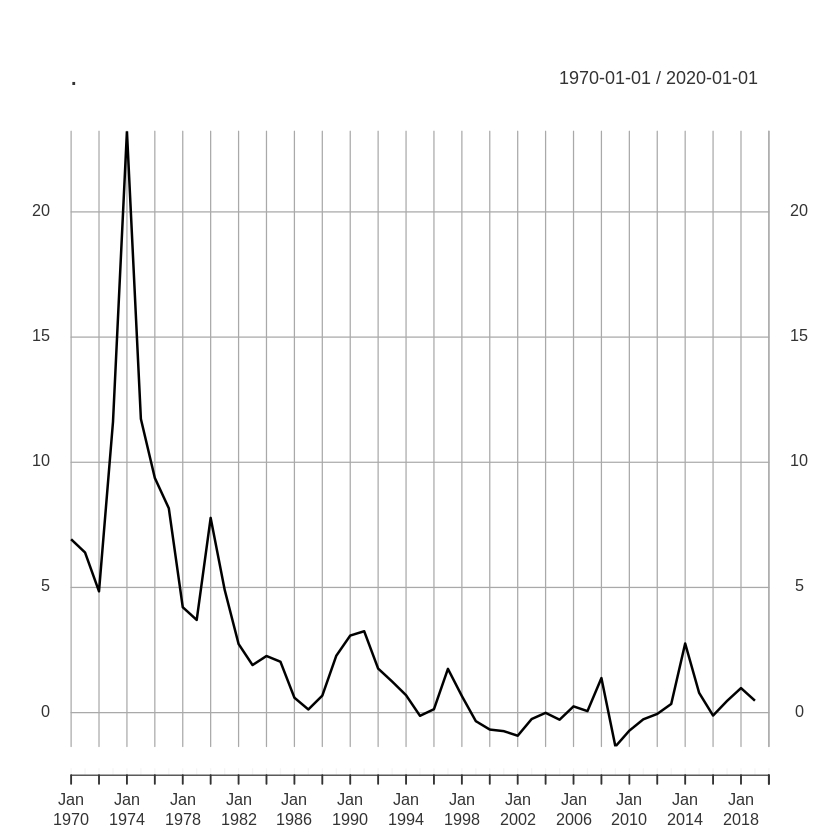

In [12]:
jp.macro <- window(merge.xts(FPCPITOTLZGJPN, LRUN64TTJPA156N), start=start.date, end=end.date)
names(jp.macro) <- c("inf.rate","unemp.rate")
jp.macro$inf.rate %>% plot()

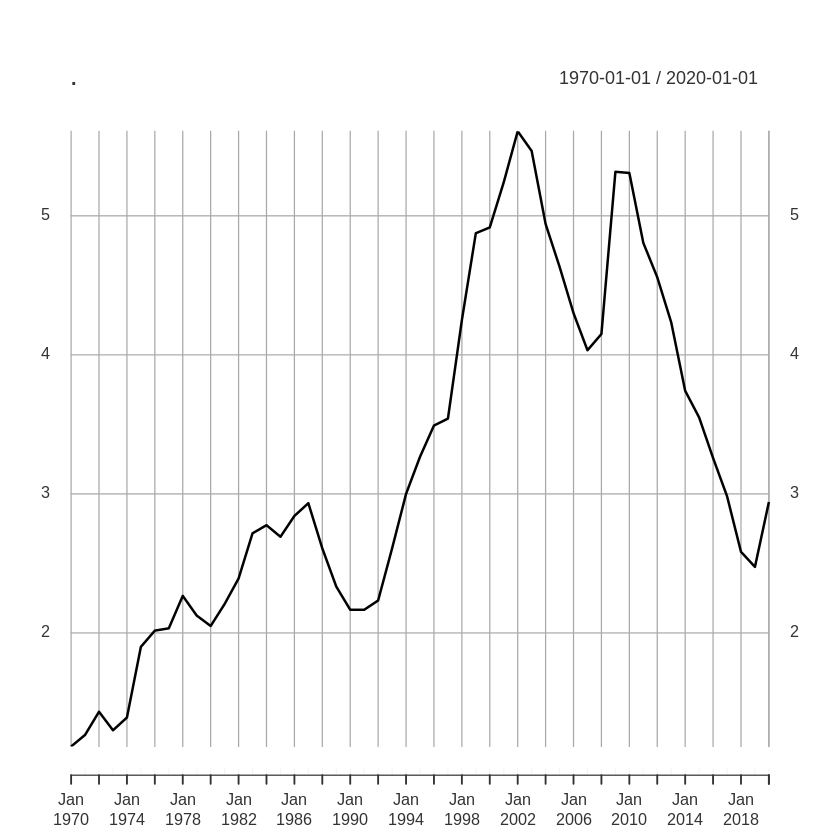

In [13]:
jp.macro$unemp.rate %>% plot()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


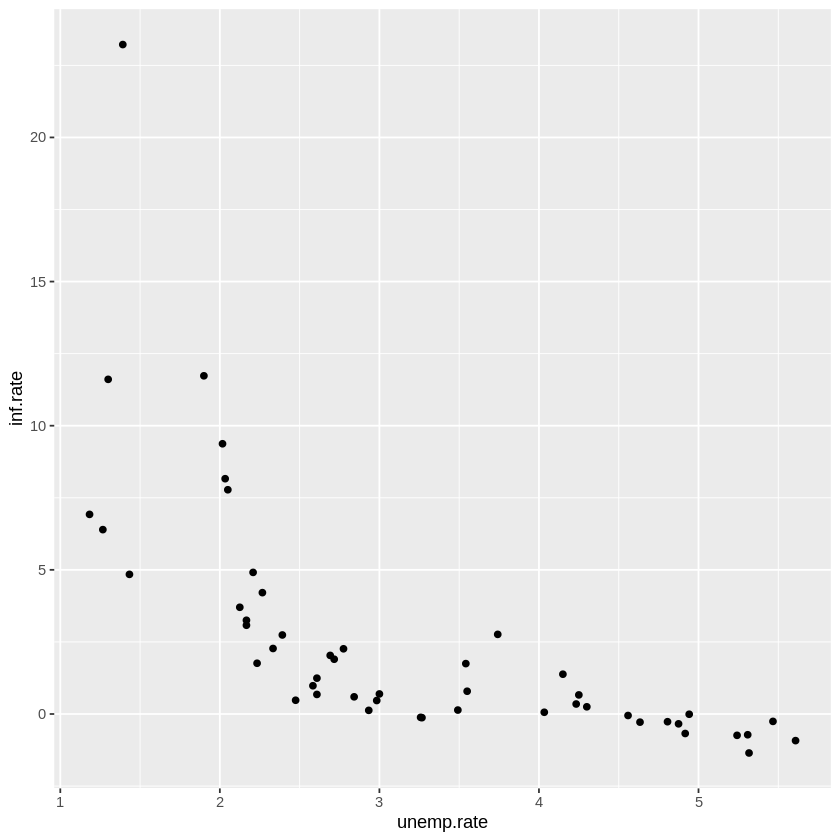

In [14]:
# ggplot2で散布図作成
jp.macro %>% ggplot(aes(x = unemp.rate, y = inf.rate)) + geom_point()

散布図に日本のフィリップス曲線が表示されました。案外簡単ですね。

この例から「Rを学ぶと効率的にデータ分析ができるようになる」ことを分かってもらえればと思います。

> なお、授業で説明したとおり、散布図は相関を示すときには有力な手法ですが、因果を意味するわけではありません。


In [ ]:
rm(list=ls())